# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Timothy

Last Name: Murphy

Student ID: 912614348

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import requests
import requests_cache
import pandas as pd
import numpy as np
import lxml.html as lx
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import random
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer


%matplotlib inline

requests_cache.install_cache("cache")

In [2]:
def aggie_page(url, page = 1):
    """
    (Purpose) 
    This function takes the URL for The CA Aggie and the number of pages to be webscraped 
    and returns the URLs for the articles on each page.

    (Args)
    (url) : url for "The California Aggie" , page : number of pages to be webscraped

    (Returns)
    A list of the URLs for each article on each page of "The California Aggie"
    """
    
    article_list = []
    for i in range(1,page+1):
        open_url = urlopen(url + "page/" + str(i))
        parse_page = BeautifulSoup(open_url, "lxml")
        content_list = parse_page.find_all(name = "h2", attrs = {"class" : "entry-title"})

        for j in range(len(content_list)):
            article = content_list[j].find_all("a")[0].attrs["href"]
            article_list.append(article)

    return article_list

In [3]:
test1 = aggie_page("https://theaggie.org/sports/", 3)
test1

['https://theaggie.org/2018/03/11/doing-more-than-dribbling/',
 'https://theaggie.org/2018/03/09/uc-davis-wins-regular-season-big-west-conference-title-in-double-overtime-thriller/',
 'https://theaggie.org/2018/03/08/aggies-win-big-in-triple-overtime-victory/',
 'https://theaggie.org/2018/03/08/womens-basketball-tears-through-competition-in-2017-18-season/',
 'https://theaggie.org/2018/03/08/collaboration-brings-together-at-risk-youth-uc-davis-mens-basketball/',
 'https://theaggie.org/2018/03/06/lawsuit-filed-mlb-player-agency-performance-enhancing-drugs/',
 'https://theaggie.org/2018/03/04/proposed-california-bill-ban-tackle-football-children-14/',
 'https://theaggie.org/2018/03/01/womens-tennis-rolls-conference-play/',
 'https://theaggie.org/2018/03/01/womens-basketball-downs-uc-irvine-clinches-conference/',
 'https://theaggie.org/2018/03/01/shorts-buzzer-beater-wins-close-game-one-point/',
 'https://theaggie.org/2018/03/01/aggies-swept-creighton-heartbreaking-fashion/',
 'https://th

In [4]:
test2 = aggie_page("https://theaggie.org/sciencetech/", 3)
test2

['https://theaggie.org/2018/03/11/the-evolution-of-dice/',
 'https://theaggie.org/2018/03/11/why-cities-are-where-they-are/',
 'https://theaggie.org/2018/03/08/california-tea-movement/',
 'https://theaggie.org/2018/03/06/first-statewide-estimation-nox-california/',
 'https://theaggie.org/2018/03/05/new-findings-brain-processes-using-virtual-reality/',
 'https://theaggie.org/2018/03/05/reserves-reliable-resource/',
 'https://theaggie.org/2018/03/04/health-and-honey/',
 'https://theaggie.org/2018/03/02/following-script-women-crying-workplace/',
 'https://theaggie.org/2018/02/27/how-does-thermoostat-work/',
 'https://theaggie.org/2018/02/26/paws-fish-skins/',
 'https://theaggie.org/2018/02/26/trusting-land-environmental-policy-native-activism/',
 'https://theaggie.org/2018/02/25/evolutionary-reason-behind-dogs-eating-poop/',
 'https://theaggie.org/2018/02/23/taste-history-glass/',
 'https://theaggie.org/2018/02/20/creating-perfect-peck-peppers/',
 'https://theaggie.org/2018/02/20/uc-davis

In [5]:
test3 = aggie_page("https://theaggie.org/arts/", 3)
test3

['https://theaggie.org/2018/03/11/the-winter-blues-a-week-10-playlist/',
 'https://theaggie.org/2018/03/11/davis-trivia-nights/',
 'https://theaggie.org/2018/03/08/review-eddie-izzard-believe-me-tour/',
 'https://theaggie.org/2018/03/07/tats-and-tech/',
 'https://theaggie.org/2018/03/05/style-watch-earthy-tones-functionality-reign/',
 'https://theaggie.org/2018/03/05/sourdough-co-opens-university-mall/',
 'https://theaggie.org/2018/03/04/creating-positive-change-fashion-onus/',
 'https://theaggie.org/2018/03/04/three-billboards-review/',
 'https://theaggie.org/2018/03/01/march-events-calendar/',
 'https://theaggie.org/2018/03/01/artists-eye-shuyi-qi/',
 'https://theaggie.org/2018/03/01/phantom-thread-review-aggies-arts-desk/',
 'https://theaggie.org/2018/02/27/judah-lion-concert-review/',
 'https://theaggie.org/2018/02/26/guest-opinion-paddington-2-breaks-new-ground-high-quality-sequels/',
 'https://theaggie.org/2018/02/26/inked/',
 'https://theaggie.org/2018/02/26/arts-humanities-ges-

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [6]:
def articles(url):
    """
    Purpose:
    Extracts the author name, article text, article title, and url for each link within specified aggie page
    
    Args:
    (url) : the url for the page to extract data
    
    Returns:
    A dictionary of the author name, article text, article title, and url for each web article
    """
    
    # request the the article
    req_url = urlopen(url)
    req_url_soup = BeautifulSoup(req_url, "lxml")
    
    # using regular expression and list comps split the author and text body
    raw_text = re.split("Written [Bb]y: ", " ".join([u.text for u in req_url_soup.findAll("p")]))
    text = raw_text[0]
    
    # check if length of list is greater than 1 and if not then the author is unknown
    if len(raw_text) > 1:
        author = raw_text[1].split("—")[0]
    else:
        author = "Unknown"
    
    # extract the title
    for i in req_url_soup.findAll("h1"):
        if len(i.text) > 0:
            title = "".join(i.text)
    
    # define dictionary with article info
    dict_articles = {"author" : author, "text": text, "title": title, "url": url}
    
    return(dict_articles)
        

In [7]:
test4 = articles("https://theaggie.org/2018/03/09/uc-davis-wins-regular-season-big-west-conference-title-in-double-overtime-thriller/")
test4

{'author': 'Ryan Bugsch ',
 'text': 'UC Davis men’s basketball team defeated UC Irvine for first seed In a sellout crowd of 5,000 in attendance at UC Irvine on March 3, the UC Davis men’s basketball team defeated the UC Irvine Anteaters 90-84 in double overtime. Coming into the last game of the conference season, Irvine and UC Davis were tied for first in the Big West Conference. This Aggie win came with the regular season Big West Conference title, pushing their conference record to 12-4 and their overall record to 21-9. It was a back-and-forth game the entire night for both teams, and junior forward AJ John racked up the stats sheet, hitting six out of 10 three pointers on the night, brining in a total of 20 points and nine rebounds for UC Davis. However, a tip of that hat is made to junior guard TJ Shorts II on the Aggies, whose hard work ethic and pure aggressiveness on the court diving for every loose ball and never being afraid to drive to the rim against players almost double hi

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [8]:
def articles_cust():
    campus_urls = aggie_page("https://theaggie.org/campus/", 4) # 60 campus news articles
    city_urls = aggie_page("https://theaggie.org/city/", 4) # 60 city news articles
    
    article_df = pd.DataFrame() # initiate article dataframe to append on
    
    # loop through the campus url list, include a category field, call the articles funct, append to article_df
    for i in campus_urls:
        campus_temp = articles(i)
        campus_temp["category"] = "campus"
        article_df = article_df.append(campus_temp, ignore_index = True)
    
    # loop through the city url list, include a category field, call the articles funct, append to article_df
    for i in city_urls:
        city_temp = articles(i)
        city_temp["category"] = "city"
        article_df = article_df.append(city_temp, ignore_index = True)
    
    return(article_df)

In [9]:
article_df = articles_cust()

In [10]:
article_df

,author,category,text,title,url
0,Jacqueline Moore,campus,Guy-Uriel Charles speaks at King Hall Duke Uni...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...
1,Priyanka Shreedar,campus,Controversial prosecution of UC Davis student ...,Last Week in Senate,https://theaggie.org/2018/03/05/last-week-sena...
2,Clara Zhao,campus,Scammers contact students posing as potential ...,ICC warns students to be wary of suspicious jo...,https://theaggie.org/2018/03/05/icc-warns-stud...
3,Aaron Liss,campus,Noah Benham faces four charges On the night of...,UC Davis student protester arrested at Yiannop...,https://theaggie.org/2018/03/04/uc-davis-stude...
4,Elizabeth Mercado,campus,"ACT slate candidates, disqualified Golden Slat...",Executive ticket candidates claim biases again...,https://theaggie.org/2018/03/01/executive-tick...
5,George Liao,campus,The Happiness Campaign seeks to reduce anxiety...,"Happiness Campaign strives for less stress, mo...",https://theaggie.org/2018/03/01/happiness-camp...
6,Sabrina Habchi,campus,Ramirez Sigala’s performance as ASUCD senator ...,Senator Term Review: Yajaira Ramirez Sigala,https://theaggie.org/2018/02/27/senator-term-r...
7,Clara Zhao,campus,History behind CALPIRG Who are the people with...,CALPIRG’s Winter Quarter pledge drives,https://theaggie.org/2018/02/27/calpirgs-winte...
8,Clara Zhao,campus,"President Michael Gofman, Vice President Shani...",ASUCD election results announced,https://theaggie.org/2018/02/26/asucd-election...
9,George Liao,campus,Systemwide student advisory board formed to in...,Sexual Violence Prevention and Response Board ...,https://theaggie.org/2018/02/26/sexual-violenc...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [11]:
###############################################################################

# credit: URL - https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html#sphx-glr-auto-examples-a-new-hope-py
# purpose: change the color of the words to a grey scale
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(50, 100)

###############################################################################

stop_words = set(STOPWORDS) # common stop words

# add in aggie specific common words that don't add value
stop_words.add("UC")
stop_words.add("Davis")
stop_words.add("student")
stop_words.add("students")
stop_words.add("campus")
stop_words.add("city")
stop_words.add("also")
stop_words.add("will")
stop_words.add("said")
stop_words.add("Sacramento")
stop_words.add("new")
stop_words.add("year")
stop_words.add("County")
stop_words.add("Yolo")

## PART 1: What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

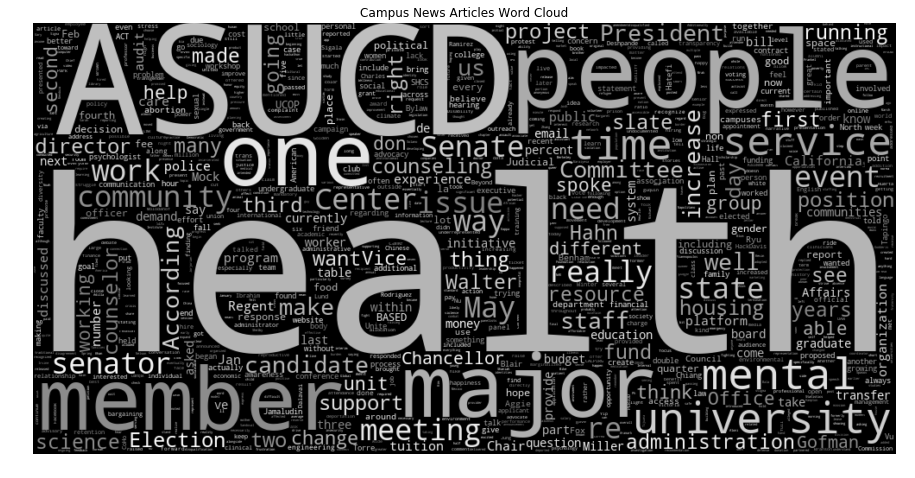

In [12]:
# word cloud for the campus articles
campus_cloud = WordCloud(stopwords = stop_words, max_words = 1500, relative_scaling = 0, width = 1000, height = 500)
campus_cloud.generate(" ".join(article_df["text"][0:59]))
plt.figure(figsize=(12,6))
plt.imshow(campus_cloud.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Campus News Articles Word Cloud")
plt.show()


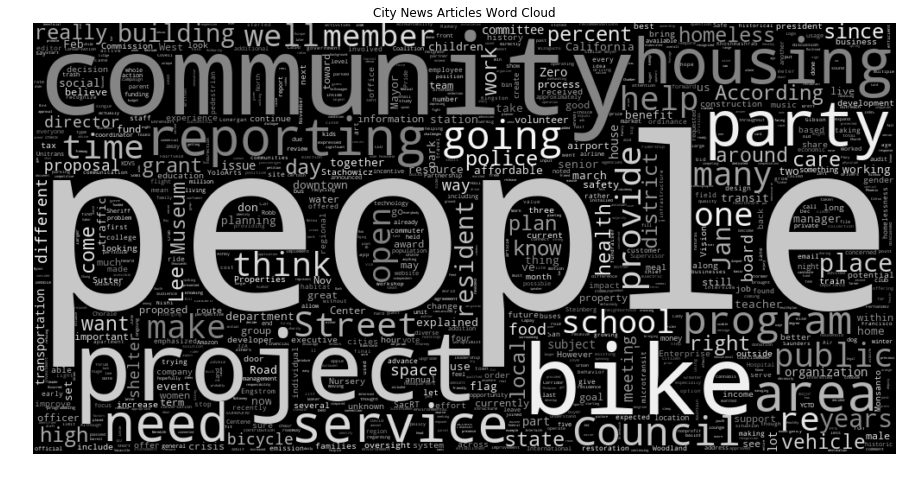

In [13]:
# word cloud for the city articles
city_cloud = WordCloud(stopwords = stop_words, max_words = 1500, relative_scaling = 0, width = 1000, height = 500)
city_cloud.generate(" ".join(article_df["text"][60:119]))
plt.figure(figsize = (12,6))
plt.imshow(city_cloud.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("City News Articles Word Cloud")
plt.show()

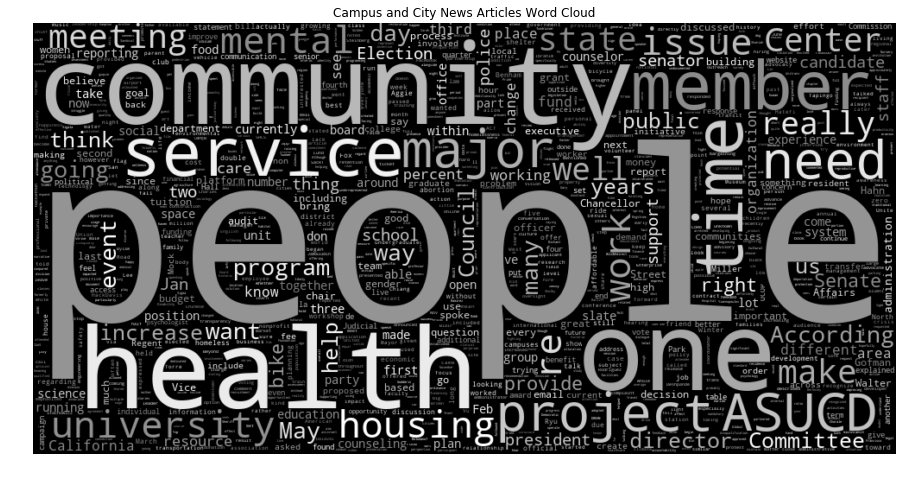

In [14]:
# word cloud for the campus and city articles 
combined_cloud = WordCloud(stopwords = stop_words, max_words = 1500, relative_scaling = 0, width = 1000, height = 500)
combined_cloud.generate(" ".join(article_df["text"]))
plt.figure(figsize = (12,6))
plt.imshow(combined_cloud.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.tight_layout(pad = -1)
plt.axis("off")
plt.title("Campus and City News Articles Word Cloud")
plt.show()

## Part 1 Conclusion:
There are topics that the campus and city sections have in common but they also differ in many ways. The topics which were mostly shared between each section were community and people. Some popular topics that the campus sectioned covered were ASUCD, health, member, major, people, service, and mental. Now for the city section some popular topics were county, community, bike, housing, party, and people. 

 ## PART 2: What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [15]:
articles = list(article_df["text"]) # place articles into list format

In [16]:
# normalize
lem = nltk.stem.WordNetLemmatizer()

def lemmatize_tokens(article):
    """
    Purpose:
    Converts words in each article to a single inflection so plurals and verb tenses are eliminated.
    
    Args:
    (article) : article from the aggie
    
    Returns:
    article lemmatized
    """
    return([lem.lemmatize(words) for words in article])

# define a dictionary for removing the punction from strings to be used in the lemmatize_norm function
rm_punctuation = dict((ord(punctuation), None) for punctuation in string.punctuation)

def lemmatize_norm(article_text):
    """
    Purpose:
    Call the lemmatize_tokens function to lemmatize and then lower case and then remove punction from the article
    
    Args:
    (article_text) : text of the article from the aggie
    
    Returns:
    article normalizaed through lemmatization
    """
    return lemmatize_tokens(nltk.word_tokenize(article_text.lower().translate(rm_punctuation)))

In [17]:
TfidfVec = TfidfVectorizer(tokenizer = lemmatize_norm, stop_words = stop_words)

def similarity_cos(articles_list):
    """
    Purpose:
    transform the articles into tf-idf vectors, then compute the cosine similarity between them. 
    
    Args:
    (articles_list) : list of the text of each article
    
    Returns:
    similarity matrix for the articles
    """
    tfidf = TfidfVec.fit_transform(articles_list)
    return (tfidf * tfidf.T).A
smat = similarity_cos(articles)
np.fill_diagonal(smat,0) # similarity matrix with the diaganol zeroed out
tri_smat = np.triu(smat) # remove the duplicates through triangular matrix

In [18]:
print(tri_smat)

[[0.         0.06180631 0.01852152 ... 0.03519663 0.01730935 0.04007432]
 [0.         0.         0.04199531 ... 0.06187935 0.05202436 0.17310988]
 [0.         0.         0.         ... 0.0360512  0.02948492 0.04857358]
 ...
 [0.         0.         0.         ... 0.         0.07526859 0.11503783]
 [0.         0.         0.         ... 0.         0.         0.04979525]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
similar_article = np.argsort(smat)[:,119] # index closely matching articles using the similarity matrix
similar_score = np.sort(smat)[:,119] # match the corresponding score using the similarity matrix

# create the new dataframe comparing articles that are similar and then output the top 3
sim_article_df = pd.DataFrame([article_df["title"], article_df["title"].values[similar_article], pd.Series(similar_score)]).transpose()
sim_article_df.columns = ["title","similar_article","score"] # rename fields

# sort and drop values based on score because of the original similarity matrix
sim_article_df = sim_article_df.sort_values(by = "score", ascending=False).drop_duplicates("score") 

## Top 3 Pairs of Most Similar Articles

In [20]:
sim_article_df.iloc[1:4] # display top 3

,title,similar_article,score
4,Executive ticket candidates claim biases again...,Adam Hatefi and Shreya Deshpande disqualified ...,0.683033
14,Mental Health Town Hall erupts in protest,Internal audit reveals steep decline in counse...,0.596477
64,Police Logs,Police Logs,0.568601


Dropped the article with score = 1 called 700-students-attend-24-hour-hackdavis-hackathon due to the fact that it is the same article posted on two different dates. 

## Pair 1

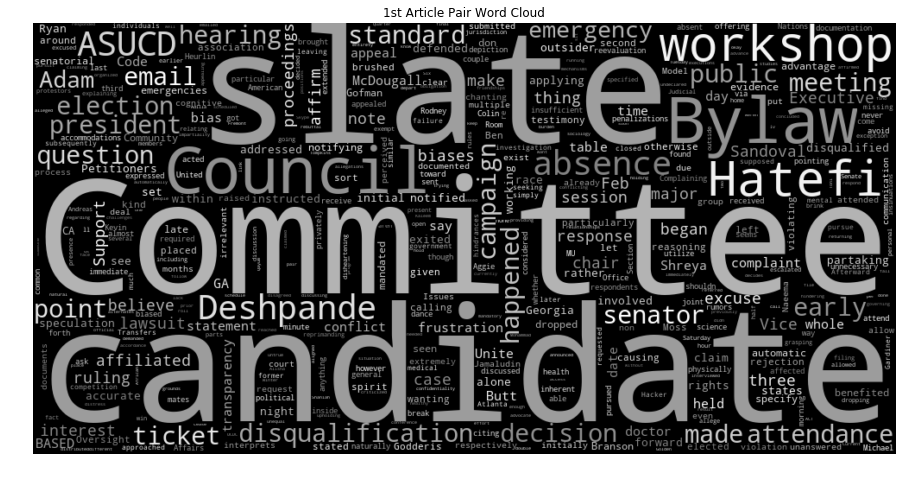

In [21]:
# input for the first pair 
cloud1 = " ".join(set(article_df["text"][4].split(" ") + article_df["text"][similar_article[4]].split(" ")))

# create word cloud for first pair 
pair_cloud1 = WordCloud(stopwords = stop_words, max_words = 1500, relative_scaling = 0, width = 1000, height = 500)
pair_cloud1.generate(cloud1)
plt.figure(figsize=(12,6))
plt.imshow(pair_cloud1.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("1st Article Pair Word Cloud")
plt.show()

## Pair 2

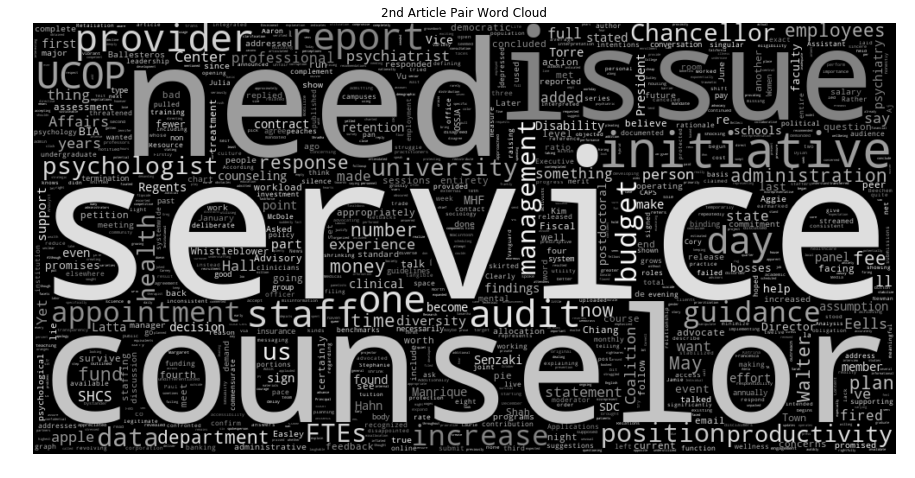

In [22]:
# input for the 2nd pair
cloud2 = " ".join(set(article_df["text"][14].split(" ") + article_df["text"][similar_article[14]].split(" ")))

# create word cloud for the 2nd pair
pair_cloud2 = WordCloud(stopwords = stop_words, max_words = 1500, relative_scaling = 0, width = 1000, height = 500)
pair_cloud2.generate(cloud2)
plt.figure(figsize=(12,6))
plt.imshow(pair_cloud2.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("2nd Article Pair Word Cloud")
plt.show()

## Pair 3

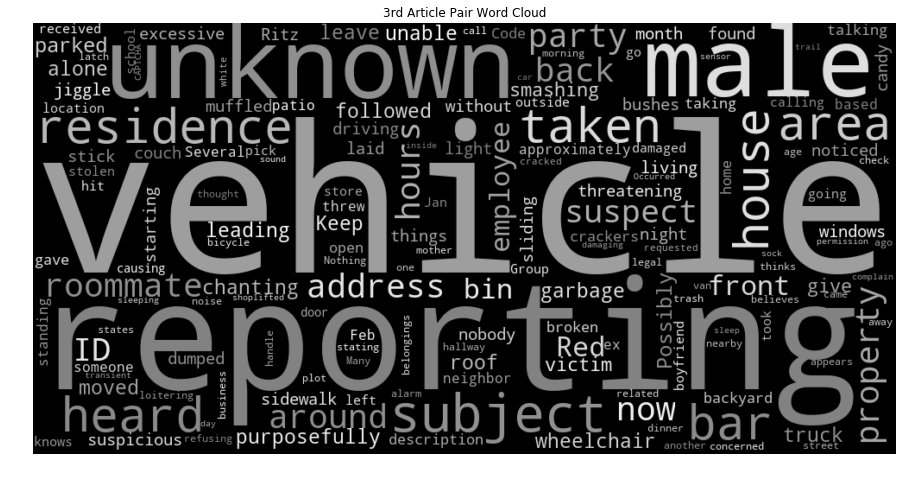

In [23]:
# input for the 3rd pair
cloud3 = " ".join(set(article_df["text"][64].split(" ") + article_df["text"][similar_article[64]].split(" ")))

# create word cloud for the 3rd pair
pair_cloud3 = WordCloud(stopwords = stop_words, max_words = 1500, relative_scaling = 0, width = 1000, height = 500)
pair_cloud3.generate(cloud3)
plt.figure(figsize=(12,6))
plt.imshow(pair_cloud3.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("3rd Article Pair Word Cloud")
plt.show()

## PART 3: Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

The corpous is for the most part representative of the Aggie. However, I think there is a bias due to the fact that I was only told to extract articles from two subsections of the Aggie (Campus, News). The natural language processor was able to find decent matches as in the article titles are very similar and the word clouds generated have words that are common amonst each of them. 

In order to better represent the Aggie, I would need to random scrape article throughout the website and determine similarities between articles. Also, it is worth noting that this corpus is not time invariant, meaning that the representation given here is highly dependent on recent events on the UC Davis campus and within the city. 

This model would be suitable for classification of the articles within their subsection on the Aggie. That is, it matches articles with similar text fairly well. 